In [109]:
import numpy as np
import os
from PIL import Image
import random
import matplotlib.pyplot as plt

In [2]:

def initialize_parameters(layerdims):
    parameters={}
    L = len(layerdims)
    for i in range(1, L):
        parameters["w"+str(i)] = np.random.randn( layerdims[i], layerdims[i-1]) * 0.1
        parameters["b"+str(i)] = np.zeros( (layerdims[i],1))
    return parameters



In [1]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def sigmoid_prime(z):
    return z * ( 1 - z )

In [3]:
def feedforward(X, parameters,layerdims):
    L = len(layerdims) 
    _all = {}
    for i in range(1,L):
        if(i==1):
            _all['Z'+str(i)] = np.dot(parameters['W'+str(i)], X) + parameters['b'+str(i)]
        else:
            _all['Z'+str(i)] = np.dot(parameters['W'+str(i)], _all['A'+str(i-1)]) + parameters['b'+str(i)]
        _all['A'+str(i)] = sigmoid(_all['Z'+str(i)])
    
    output =  _all['A'+str(L-1)]
    return output,_all

In [79]:
def calculate_cost(A2, Y):
    m = Y.shape[1] # number of example
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2),1-Y)
    cost = - np.sum(logprobs)/m
    return cost

In [4]:
def backpropagation(X,Y,params,_all,layerdims):
    #Required parameters
    m = X.shape[1]
    grads ={}
    L = len(layerdims) - 1
    grads['dZ'+str(L)] = _all['A'+str(L)] - Y
    grads['dW'+str(L)] = np.dot(grads['dZ'+str(L)] * sigmoid_prime(_all['A'+str(L)]) ,  np.transpose(_all['A'+str(L-1)]) )
    grads['db'+str(L)] = np.sum(grads['dZ'+str(L)], axis = 1, keepdims = True)/m
    
    for i in list(reversed(range(1,L))):
        grads['dZ'+str(i)] = np.dot(params['W'+str(i+1)].T,grads['dZ'+str(i+1)])
        if(i==1):
            grads['dW'+str(i)] = np.dot(grads['dZ'+str(i)] * sigmoid_prime(_all['A'+str(i)]) ,  np.transpose(X) )
        else:
            grads['dW'+str(i)] = np.dot(grads['dZ'+str(i)] * sigmoid_prime(_all['A'+str(i)]) ,  np.transpose(_all['A'+str(i-1)]) )
        grads['db'+str(i)] = np.sum(grads['dZ'+str(i)], axis = 1, keepdims = True)/m
    
    return grads

In [5]:
def update_params(params, grads, learning_rate):
    # each layer has 2 parameters (W,b)
    L = len(params) // 2
    for l in range(L):
        params["W"+str(l+1)] = params["W"+str(l+1)] - learning_rate * grads["dW"+str(l+1)]
        params["b"+str(l+1)] = params["b"+str(l+1)] - learning_rate * grads["db"+str(l+1)]
        
    return params

In [12]:
cwd=os.getcwd()
data_path_training = cwd + '/training'
data_path_testing = cwd + '/testing'

directories = [d for d in os.listdir(data_path_training) 
                   if os.path.isdir(os.path.join(data_path_training, d))]
test_images = []
test_labels = []
labels = []
images = []
for image in os.listdir(data_path_testing):
    test_labels.append(image.split("_")[0])
    url = os.path.join(data_path_testing,image)
    img = np.array(Image.open(url))
    test_images.append(img)
for d in directories:
    label_dir = os.path.join(data_path_training, d)
    filenames = [os.path.join(label_dir, file) for file in os.listdir(label_dir) if file.endswith(('.png','.jpg')) ]
    
    for f in filenames:
        img = np.array(Image.open(f))
        images.append(img)
        labels.append(d)

print("Unique Classes: {0}\nTotal Images: {1}".format(len(set(labels)), len(images)))
test_percentage = len(test_images) / (len(images) + len(test_images)) 
print("Test images: {} ({}%)".format(len(test_images),int(test_percentage*100)))

Unique Classes: 21
Total Images: 383
Test images: 193 (33%)


In [196]:
trainX_one = []
testX_one = []
for image in images:
    image = ((np.asfarray(image) / 255.0 * 0.99) + 0.01 ).flatten()
    Input = np.array(image, ndmin=2).T
    trainX_one.append(Input)
    
for image in test_images:
    image = ((np.asfarray(image) / 255.0 * 0.99) + 0.01 ).flatten()
    Input = np.array(image, ndmin=2).T
    testX_one.append(Input)


In [61]:
trainX = []
trainY = []
for record in images:
        # scale and shift the inputs
        Input = ((np.asfarray(record) / 255.0 * 0.99) + 0.01 ).flatten()
        trainX.append(Input)
for label in labels:
        targets = np.zeros(21) + 0.01
        targets[int(label)-1] = 0.99
        trainY.append(targets)
trainX = np.array(trainX, ndmin=2).T
trainY = np.array(trainY, ndmin=2).T


In [6]:
def neuralNetwork(trainX, trainY, network_size, num_epochs = 100,learning_rate=.01, print_output = True):
    params = initialize_parameters(network_size)
    # Loop (gradient descent)
    for epoch in range(0, num_epochs):
         
        # Forward propagation
        output, layerHistoy = feedforward(trainX, params,network_size)
        # Compute the cost
        cost = calculate_cost(output, trainY)
        # Backpropagation
        grads = backpropagation( trainX, trainY,params, layerHistoy,network_size)
        # Gradient descent parameter update
        params = update_params(params, grads,learning_rate)

        # Print the cost every 1000 iterations
        if print_output and epoch % 10 == 0:
            print ("Cost after iteration %i: %f" %(epoch, cost))
            costs.append(cost)
    return params,costs

In [394]:
layerdims = [6720,500,21]
newParams,costs_new = neuralNetwork(trainX,trainY,layerdims,num_epochs=2000,learning_rate=.001) 

6720
21
Cost after iteration 0: 48.572606
Cost after iteration 10: 10.098366
Cost after iteration 20: 9.495147
Cost after iteration 30: 9.288067
Cost after iteration 40: 9.278682
Cost after iteration 50: 9.265783
Cost after iteration 60: 9.224686
Cost after iteration 70: 9.205763
Cost after iteration 80: 9.189240
Cost after iteration 90: 9.202532
Cost after iteration 100: 9.161576
Cost after iteration 110: 9.139248
Cost after iteration 120: 9.150843
Cost after iteration 130: 9.110103
Cost after iteration 140: 9.085584
Cost after iteration 150: 9.079480
Cost after iteration 160: 9.066217
Cost after iteration 170: 9.048384
Cost after iteration 180: 9.028589
Cost after iteration 190: 8.994332
Cost after iteration 200: 8.981009
Cost after iteration 210: 8.956375
Cost after iteration 220: 8.919893
Cost after iteration 230: 8.894132
Cost after iteration 240: 8.868668
Cost after iteration 250: 8.849211
Cost after iteration 260: 8.803529
Cost after iteration 270: 8.779931
Cost after iteration 

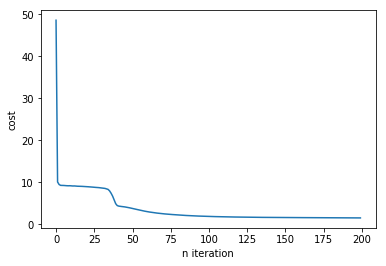

In [395]:
plt.plot(costs)
plt.xlabel("n iteration")
plt.ylabel("cost")
plt.show()

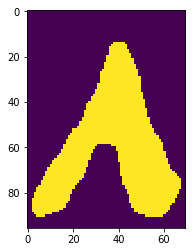

8
2


In [423]:
index = random.randint(0,len(images))
image = ((np.asfarray(images[index]) / 255.0 * 0.99) + 0.01 ).flatten()
Input = np.array(image, ndmin=2).T
display(index)
output, _ = feedforward(Input, newParams)
print(labels[index])
print(np.argmax(output)+1)

In [456]:
index = random.randint(0,len(images))
Yup = []
for i in range(0,len(images)):
    image = ((np.asfarray(images[i]) / 255.0 * 0.99) + 0.01 ).flatten()
    Input = np.array(image, ndmin=2).T
    out,_ = forward_propagation(Input, parameters)
    correct = labels[i]
    plate = np.argmax(out)+1
    if int(correct) == int(plate):
        Yup.append(correct)


In [458]:

print(len(Yup)/len(images))

0.9295039164490861


In [239]:
def display(index,Type="train"):
    if Type=="train":
        plt.imshow(images[index])
        
    elif Type=="test":
        plt.imshow(test_images[index])
        
    plt.show()